In [1]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_target), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 3us/step


In [10]:
print(train_data.shape)
print(train_target.shape)

(404, 13)
(404,)


In [12]:
mean = train_data.mean(axis=0)
train_data -= mean

std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [13]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop",
                  loss="mse",
                  metrics=["mae"])
    return model

In [27]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Preprocessing fold ---{i}---")
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples] #prepares the validation data
    val_targets = train_target[i * num_val_samples : (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_target[:i * num_val_samples],
         train_target[(i+1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets, epochs=num_epochs,
              batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Preprocessing fold ---0---
Preprocessing fold ---1---
Preprocessing fold ---2---
Preprocessing fold ---3---


In [29]:
print(all_scores)
print(np.mean(all_scores))

[1.961140513420105, 2.614988088607788, 2.5175654888153076, 2.3615989685058594]
2.363823264837265


In [30]:
num_epochs = 500
all_mae_histories = [] 
for i in range(k):
    print(f"Preprocessing fold ---{i}---")
    val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples] #prepares the validation data
    val_targets = train_target[i * num_val_samples : (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_target[:i * num_val_samples],
         train_target[(i+1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, 
                        partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs,
                        batch_size=16, 
                        verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Preprocessing fold ---0---
Preprocessing fold ---1---
Preprocessing fold ---2---
Preprocessing fold ---3---


In [34]:
print(all_mae_histories)
print(len(all_mae_histories[0]))

[[18.634174346923828, 15.242269515991211, 11.29192066192627, 7.50535249710083, 5.434122085571289, 4.352574348449707, 3.75209641456604, 3.2925949096679688, 3.143343687057495, 2.9253978729248047, 2.7683799266815186, 2.8009836673736572, 2.6889588832855225, 2.7142608165740967, 2.5513556003570557, 2.5427474975585938, 2.5695502758026123, 2.5850775241851807, 2.3926479816436768, 2.380413055419922, 2.4155218601226807, 2.375684976577759, 2.444441318511963, 2.253225326538086, 2.20686411857605, 2.24336838722229, 2.0926311016082764, 2.194380760192871, 2.182508945465088, 2.100939989089966, 2.221299648284912, 2.065962314605713, 2.2629191875457764, 2.0455925464630127, 2.1201958656311035, 2.0952608585357666, 2.0253052711486816, 2.0250394344329834, 2.0197315216064453, 2.0793988704681396, 2.0038366317749023, 2.0298805236816406, 2.1473019123077393, 1.9955253601074219, 2.0187196731567383, 2.0622968673706055, 2.063502550125122, 2.1498827934265137, 2.031909227371216, 1.982715368270874, 2.0485739707946777, 2.

In [36]:
average_mae = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
#This will take the each epoch's i-th mae value and get the mean

In [38]:
print(average_mae)
print(len(average_mae))

[19.558300971984863, 16.29558277130127, 12.310636281967163, 8.440104484558105, 6.155525326728821, 4.912354350090027, 4.2464370131492615, 3.76802134513855, 3.5198395252227783, 3.353538453578949, 3.2246804237365723, 3.1391581892967224, 3.0712109804153442, 3.0468981862068176, 2.9051296710968018, 2.8488799333572388, 2.792422115802765, 2.7426385283470154, 2.7004005312919617, 2.6917824745178223, 2.651492714881897, 2.6719802618026733, 2.674323260784149, 2.6278600692749023, 2.5825294256210327, 2.5504270792007446, 2.5799074172973633, 2.529308557510376, 2.589163661003113, 2.4883387684822083, 2.5348024368286133, 2.511079728603363, 2.565679609775543, 2.4940096735954285, 2.455379009246826, 2.5061569809913635, 2.5136669874191284, 2.408265471458435, 2.435844600200653, 2.462687373161316, 2.493575870990753, 2.4262511134147644, 2.4746418595314026, 2.419773757457733, 2.4484832286834717, 2.4692934155464172, 2.433457851409912, 2.4972694516181946, 2.417333424091339, 2.406264841556549, 2.486511707305908, 2.3

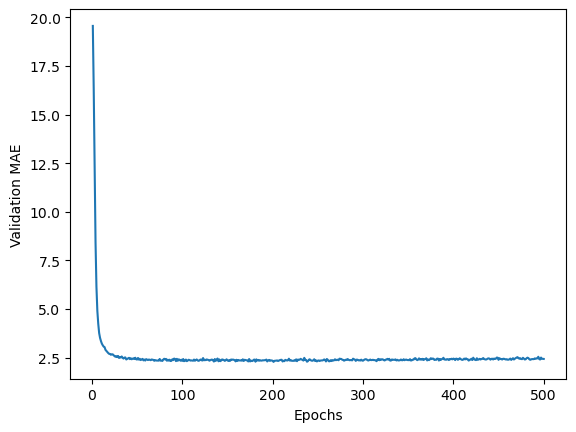

In [40]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae) + 1), average_mae)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

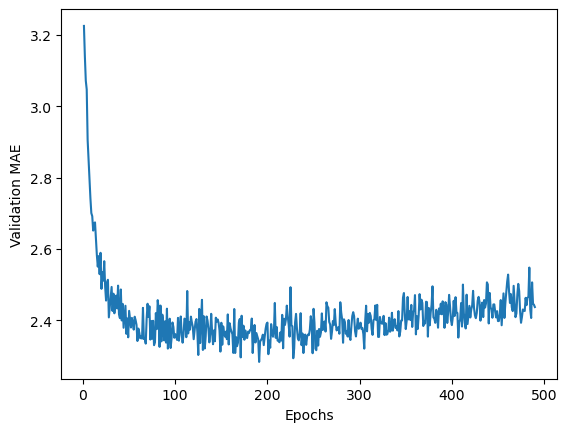

In [41]:
truncated_mae_history = average_mae[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

Model is trying to overfit after the 120 - 130 epochs so it is best to train for 120 epochs

In [42]:
model = build_model()
model.fit(train_data, train_target, epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 16.1239 - mae: 2.5166


In [43]:
test_mae_score

2.5166006088256836

In [44]:
predictions = model.predict(test_data)

4/4 [==============================] - 2s 2ms/step


In [45]:
print(predictions[0])
print(test_targets[0])

[8.0972185]
7.2
